# The UFC Hen that laid golden eggs
CSV from: https://www.kaggle.com/datasets/remypereira/mma-dataset-2023-ufc?resource=download

### Import files and create DataFrames  

In [1]:
import pandas as pd

Creta a Dataframe with content on CSV

In [2]:
df_fighters = pd.read_csv('data/ufc_fighter_data.csv')
df_fighters_stats = pd.read_csv('data/ufc_fight_stat_data.csv')
df_fights = pd.read_csv('data/ufc_fight_data.csv')
df_events = pd.read_csv('data/ufc_event_data.csv')

Rename columns to be more clear 

In [3]:
df_fighters = df_fighters.rename(
    columns={
        'fighter_f_name': 'name', 
        'fighter_l_name': 'lastname', 
        'fighter_nickname': 'nickname',
        'fighter_height_cm': 'height_cm',
        'fighter_weight_lbs': 'weight_lbs',
        'fighter_reach_cm': 'reach_cm',
        'fighter_stance': 'stance',
        'fighter_dob': 'date_birth',
        'fighter_w': 'wins',
        'fighter_l': 'losses',
        'fighter_d': 'draws',
        'fighter_nc_dq': 'no_contests', # No. of no contests or disqualifications
        'fighter_url': 'url' # URL used to scrape fighter data from ufcstats.com
    })

In [4]:
df = pd.merge(df_fights, df_fighters_stats, on='fight_id', how='inner')
df = pd.merge(df, df_fighters, on='fighter_id', how='inner')
df_events = pd.merge(df, df_events, on='event_id', how='inner')

## Stats about MMA figherts

### Fighter with more fights in UFC

In [5]:
# Count the number of fights per fighter
fights_per_fighter = df_events['fighter_id'].value_counts()

# Create a dataframe with the number of fights per fighter
df_fights_per_fighter = pd.DataFrame({'fighter_id': fights_per_fighter.index, 'num_fights': fights_per_fighter.values}) 

# Merge the dataframe with the number of fights per fighter with the dataframe of fighters
df_fights_per_fighter = pd.merge(df_fights_per_fighter, df_fighters, on='fighter_id', how='inner')

fighter_more_fights = df_fights_per_fighter.sort_values(by='num_fights', ascending=False)
fighter_more_fights[['num_fights', 'name', 'nickname', 'lastname', 'nickname']].head(5)


,num_fights,name,nickname,lastname,nickname
0,41,Jim,A-10,Miller,A-10
1,39,Andrei,The Pitbull,Arlovski,The Pitbull
2,37,Donald,Cowboy,Cerrone,Cowboy
3,35,Clay,The Carpenter,Guida,The Carpenter
4,34,Rafael,NaN,Dos Anjos,NaN


![Fighter](images\jimMiller.png "Jim Miller")


### Youngest's UFC Fighter

In [6]:
from datetime import datetime

df_fighters['date_birth'] = pd.to_datetime(df_fighters['date_birth'])
df_fighters['age'] = None
today = datetime.now().date()

for index, row in df_fighters.iterrows():
    birth_date = row['date_birth'].date()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    df_fighters.at[index, 'age'] = age

In [16]:
df_fighters_sorted = df_fighters.sort_values(by='age', ascending=True)
df_fighters_sorted[['name', 'lastname', 'age']].head(5)

,name,lastname,age
3161,Raul,Rosas Jr.,19
3778,Takeru,Uchida,21
789,Igor,Da Silva,21
2041,JungHyun,Lee,21
2641,Yamato,Nishikawa,21


![Fighter](images\raulRosasJr.png " Raul Rosas Jr")


### Tallest's Fighter

In [7]:
df_fighters_sorted = df_fighters.sort_values(by='height_cm', ascending=False)
df_fighters_sorted[['name', 'nickname', 'lastname', 'height_cm']].head(5)

,name,nickname,lastname,height_cm
3407,Paulo,Giant,Cesar Silva,226.06
634,Hong,Techno Goliath,Man Choi,218.44
2874,Cory,LA Giant,Peterson,210.82
3598,Stefan,Skyscraper,Struve,210.82
1759,Nathan,NaN,Jones,210.82


![Fighter](images\PauloCesarSilva.webp "Paulo Cesar Silvar")


### Heaviest's fighter

In [8]:
df_fighters_sorted = df_fighters.sort_values(by='weight_lbs', ascending=False)
df_fighters_sorted['weight_kg'] = df_fighters_sorted['weight_lbs'] * 0.453592
df_fighters_sorted[['name', 'nickname', 'lastname', 'weight_lbs', 'weight_kg']].head(5)

,name,nickname,lastname,weight_lbs,weight_kg
4046,Emmanuel,NaN,Yarborough,770.0,349.26584
3767,Teila,NaN,Tuli,430.0,195.04456
2990,Thomas,NaN,Ramirez,410.0,185.97272
2874,Cory,LA Giant,Peterson,400.0,181.43680
2300,John,NaN,Matua,400.0,181.43680


![Fighter](images\Emanuel_Yarborough.webp "Emanuel Yarborough")


In [9]:
more_victories = df_fighters.sort_values(by='wins', ascending=False)
more_victories[['name', 'nickname', 'lastname', 'wins', 'losses', 'draws', 'no_contests']].head(5)

,name,nickname,lastname,wins,losses,draws,no_contests
1195,Travis,The Ironman,Fulton,253,53,1,1.0
3362,Dan,The Beast,Severn,101,19,1,NaN
1602,Jeremy,Gumby,Horn,91,22,5,1.0
3998,Travis,The Diesel,Wiuff,75,21,0,1.0
3272,Luis,NaN,Santos,63,10,1,1.0


![Fighter](images\TravisFulton.jpg "Travis Fulton")

## Fights Stats and advanced data

### Fighter age histogram 

#### Create a DataFrame with age of all figherts based on fights taken on a event

In [66]:
df_events['event_date'] = pd.to_datetime(df_events['event_date'])
df_fighters['date_birth'] = pd.to_datetime(df_fighters['date_birth'])

# Verificar valores NaN nas colunas de lutadores
print(df_events[['f_1', 'f_2']].isna().sum())

# Filtrar lutas com lutadores válidos
df_events = df_events.dropna(subset=['f_1', 'f_2']).copy()

# Criar um dicionário para mapear fighter_id para data de nascimento
fighter_birthdays = df_fighters.set_index('fighter_id')['date_birth'].to_dict()

# Função para calcular a idade na data da luta
def calculate_age(event_date, birth_date):
    if pd.isna(birth_date):
        return None
    return event_date.year - birth_date.year - ((event_date.month, event_date.day) < (birth_date.month, birth_date.day))

# Calcular a idade dos lutadores no dia da luta
df_events['f1_age'] = df_events.apply(lambda row: calculate_age(row['event_date'], fighter_birthdays.get(row['f_1'], pd.NaT)), axis=1)
df_events['f2_age'] = df_events.apply(lambda row: calculate_age(row['event_date'], fighter_birthdays.get(row['f_2'], pd.NaT)), axis=1)

# Verificar o DataFrame atualizado
ages_combined = pd.concat([df_events['f1_age'], df_events['f2_age']], ignore_index=True).dropna().reset_index(drop=True)


f_1    0
f_2    0
dtype: int64


#### Load libs

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

df_ages = pd.DataFrame({'ages_combined': ages_combined})

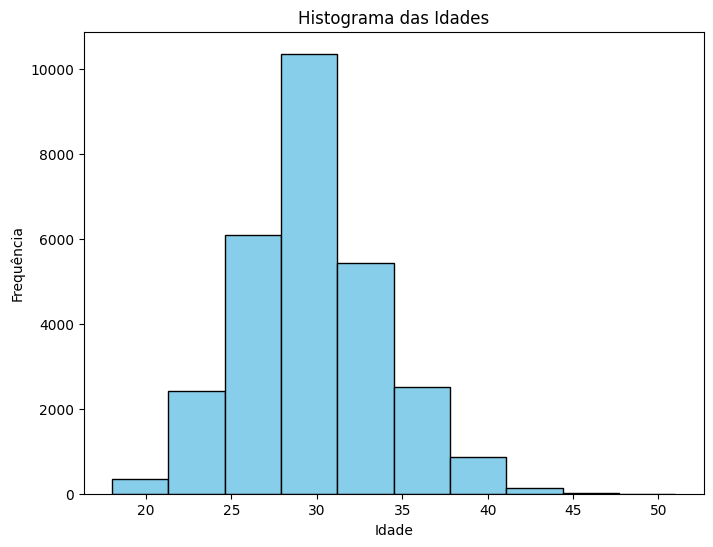

In [61]:
plt.figure(figsize=(8, 6))
plt.hist(df_ages['ages_combined'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()